In [146]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
file = pd.read_csv(r"C:\Users\UltraBook 3.1\Desktop\data_analysis projects\Churn_prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [185]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [191]:
# len(file[file['tenure'] <=12 & file['gender']=='Male'])
len(file[(file['tenure'] <= 12) & (file['gender'] == 'Female') & (file['Churn'] =='Yes')])
# male churn,tenure<=12 and male 506
# female churn,tenure<=12 and female 531

531

In [189]:
file[file['tenure'] <= 12]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–12
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–12
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–12
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0–12
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0–12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No,0–12
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,0–12
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No,13–24
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0–12


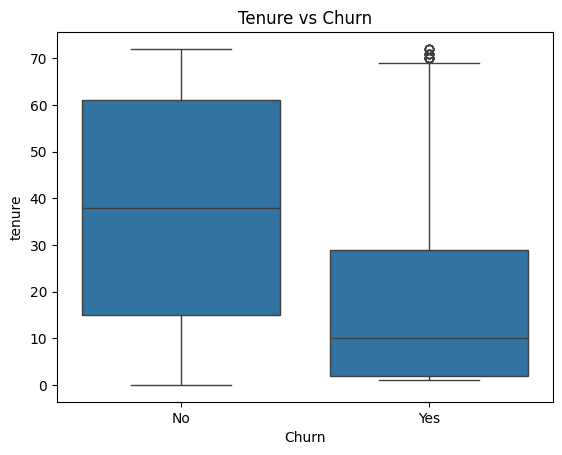

In [147]:
sns.boxplot(x='Churn', y='tenure', data=file)
plt.title('Tenure vs Churn')
plt.show()

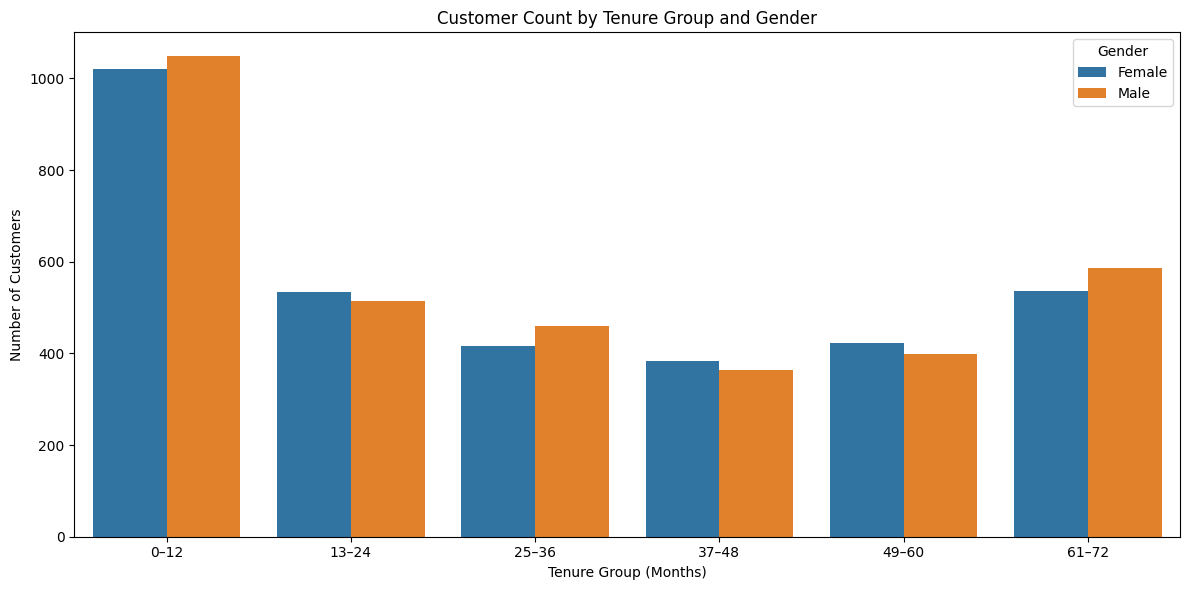

In [157]:
import matplotlib.pyplot as plt

# Create tenure bins
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0–12', '13–24', '25–36', '37–48', '49–60', '61–72']
file['tenure_group'] = pd.cut(file['tenure'], bins=bins, labels=labels, right=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=file, x='tenure_group', hue='gender')
plt.title('Customer Count by Tenure Group and Gender')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


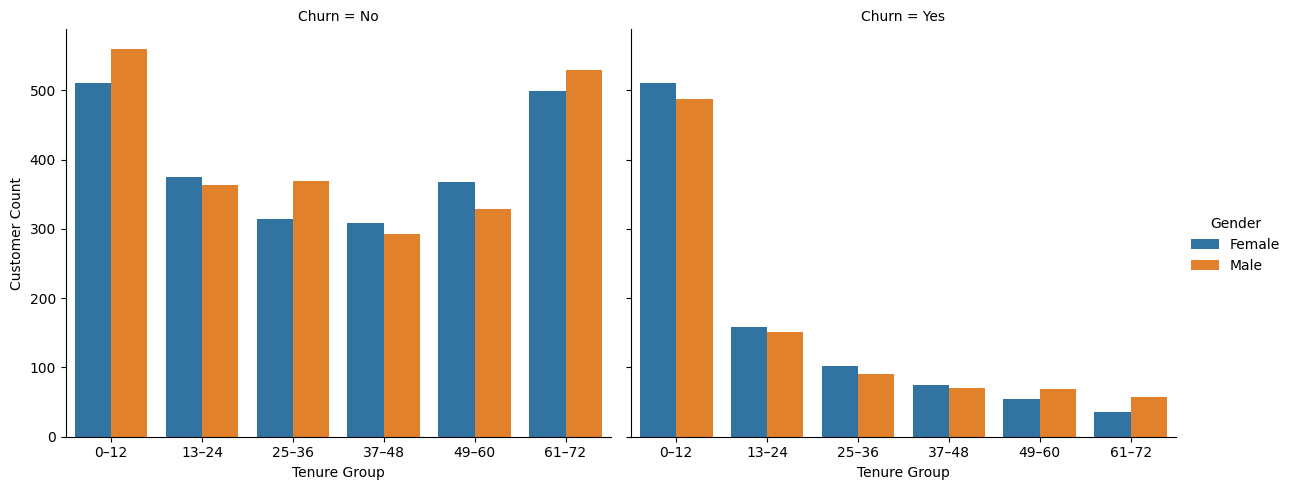

In [159]:
g = sns.catplot(
    data=file, 
    x='tenure_group', 
    hue='gender', 
    col='Churn', 
    kind='count',
    height=5, 
    aspect=1.2
)
g.set_titles("Churn = {col_name}")
g.set_axis_labels("Tenure Group", "Customer Count")
g._legend.set_title("Gender")


In [ ]:
# observations made
# most of our clients are males, with close to 51% and females 49.53%
# most clients churn within the first 12 months of subscription, why?
# And also over time the churning rate decreased significantly what was different that led to this decrease


In [160]:
# sample out the first year
first_yr = file[file['tenure'] <= 12]

C:\Users\UltraBook 3.1\AppData\Local\Temp\ipykernel_22760\3538147818.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=first_yr, x='Contract', y='tenure', hue='gender', ci=None)


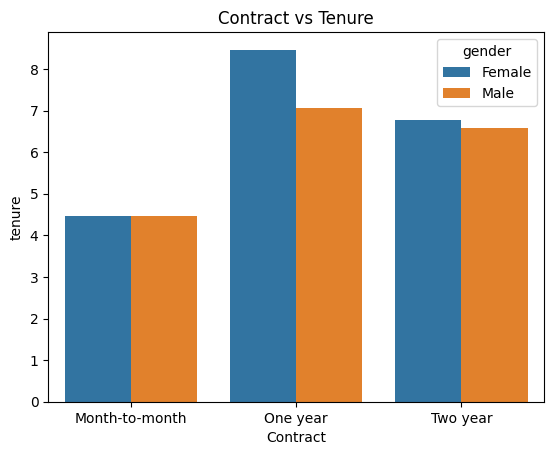

In [168]:
# first_yr.Contract.value_counts()
sns.barplot(data=first_yr, x='Contract', y='tenure', hue='gender', ci=None)
plt.title('Contract vs Tenure')
plt.show()


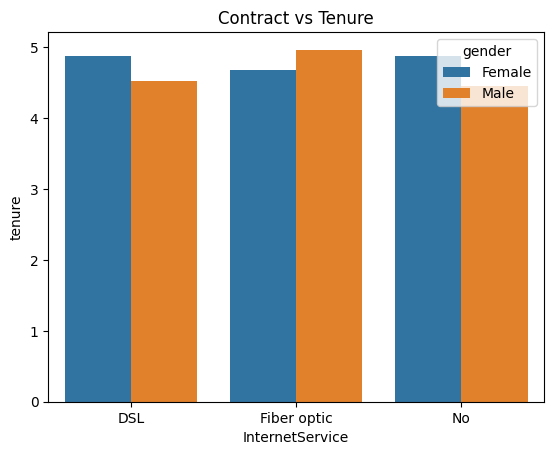

In [170]:
# which service caused the highest churnin.
sns.barplot(data=first_yr, x='InternetService', y='tenure', hue='gender', errorbar=None)
plt.title('Contract vs Tenure')
plt.show()


In [119]:
for col in file.columns:
    print(file[col].value_counts())
    print("-------")

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
-------
gender
Male      3555
Female    3488
Name: count, dtype: int64
-------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
-------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
-------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
-------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
-------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
-------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
-------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
-------
OnlineSecurity
No       

In [5]:
# Male      3555
# Female    3488
ratio = 3555/3488

ratio

1.0192087155963303

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
# convert/ change datatype 
file['TotalCharges'] = file['TotalCharges'].str.strip().replace('', 0.000)
file['TotalCharges'] = file['TotalCharges'].fillna(0.0000)
file['TotalCharges'] = file['TotalCharges'].astype(float)
# s_float = s.astype(float)

In [18]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [50]:
file_copy = file.copy()
target_column = file_copy['Churn']
file_copy.drop(columns=['customerID', 'Churn'], inplace=True)


In [51]:
file_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [52]:
# List of categorical columns to one-hot encode
categorical_cols = file_copy.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical columns
df_encoded = pd.get_dummies(file_copy, columns=categorical_cols, drop_first=True)
df_encoded = df_encoded.astype(int)
# Preview the encoded DataFrame
print(df_encoded.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1              29            29            0   
1              0      34              56          1889            1   
2              0       2              53           108            1   
3              0      45              42          1840            1   
4              0       2              70           151            0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                               1                  0  ...   
1                               0                  0  ...   
2                               0                  0  ...   
3               

In [53]:
df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84,1990,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103,7362,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29,346,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74,306,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [54]:
# apply principal component analysis to reduce dimensions
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)  # df_encoded = your 31-column one-hot encoded DataFrame

# Step 2: Apply PCA
pca = PCA(n_components=None)  # You can change this to a number like 2 or 0.95 (for explained variance)
pca_data = pca.fit_transform(scaled_data)

# Step 3: Explained variance
explained_var = pca.explained_variance_ratio_

# Step 4: Convert to DataFrame for visualization

pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])


In [55]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.428830,-3.152138,-3.498347,-2.223414,1.131174,0.250487,0.587160,-1.141561,0.502500,0.451973,...,0.308606,0.462636,-0.014479,-2.181335e-14,5.798103e-15,3.504870e-14,-1.611185e-14,-6.347412e-14,1.510898e-14,-1.560800e-14
1,-0.199463,-0.795793,-1.233250,2.795695,-1.391981,1.117407,-0.995429,1.048496,0.789691,0.664161,...,0.180790,-0.128843,0.042098,7.232368e-14,-2.417609e-14,-1.103319e-13,4.869737e-14,2.000245e-13,-4.817306e-14,5.067873e-14
2,-0.156778,-2.090791,-0.830191,2.485358,-0.350221,-0.763617,-0.586965,0.949135,0.956344,-0.271349,...,0.100334,-0.027327,-0.043831,-7.527549e-14,2.669467e-14,1.137205e-13,-5.076259e-14,-2.071711e-13,5.072859e-14,-5.263484e-14
3,-0.900246,-0.878441,-4.981540,-0.171263,-1.744065,1.247052,-0.468431,0.928689,0.214189,1.602248,...,0.231358,-0.209618,0.071389,1.216660e-13,-4.015143e-14,-1.848202e-13,8.187800e-14,3.351372e-13,-8.057133e-14,8.513670e-14
4,-0.611619,-3.175720,1.202839,0.093225,0.396510,-0.542171,0.465487,-1.042085,-0.640669,0.591856,...,0.303108,0.062787,0.014631,2.806342e-14,-1.945947e-14,-4.222282e-14,1.869364e-14,7.638622e-14,-1.864180e-14,1.947504e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-1.892785,1.300273,-0.748792,2.114341,0.560410,2.328976,-1.354597,0.877624,-0.469877,-1.513053,...,0.460654,-0.283604,-0.013796,-2.552505e-14,1.529591e-14,3.746519e-14,-1.629236e-14,-6.775592e-14,1.740116e-14,-1.798148e-14
7039,-3.134855,3.148066,0.850032,-0.249138,-0.533865,2.307204,1.421118,-1.024272,-0.608294,-1.485283,...,-0.379961,0.268546,-0.045565,-7.597897e-14,2.729673e-14,1.177044e-13,-5.184094e-14,-2.123370e-13,5.104483e-14,-5.361932e-14
7040,-0.340819,-2.487013,-4.044929,-1.494053,2.417192,0.625352,1.101580,-1.196181,0.259441,0.561213,...,-0.177615,0.326268,-0.015494,-2.197988e-14,1.246189e-15,3.527075e-14,-1.622287e-14,-6.500068e-14,1.594165e-14,-1.644067e-14
7041,-0.617128,-2.048962,1.396032,0.560308,0.562141,-0.401372,0.162397,1.183114,2.711707,-2.215722,...,0.554219,-0.077928,-0.013549,-2.292848e-14,7.265763e-15,3.461707e-14,-1.540198e-14,-6.173189e-14,1.559004e-14,-1.560890e-14


In [56]:
explained_var

array([3.31796250e-01, 1.19838969e-01, 9.02172540e-02, 4.75177319e-02,
       4.14620848e-02, 4.11970922e-02, 3.81188528e-02, 3.33671103e-02,
       3.12050550e-02, 2.95262574e-02, 2.66013372e-02, 2.37814234e-02,
       2.24860954e-02, 2.05586555e-02, 2.02248727e-02, 1.75327852e-02,
       1.55541274e-02, 1.52435934e-02, 1.46654542e-02, 9.22958701e-03,
       7.92092289e-03, 1.92219115e-03, 3.22967909e-05, 9.45830465e-18,
       4.37651270e-18, 2.94094619e-18, 1.52504431e-18, 4.59698802e-19,
       0.00000000e+00, 0.00000000e+00])

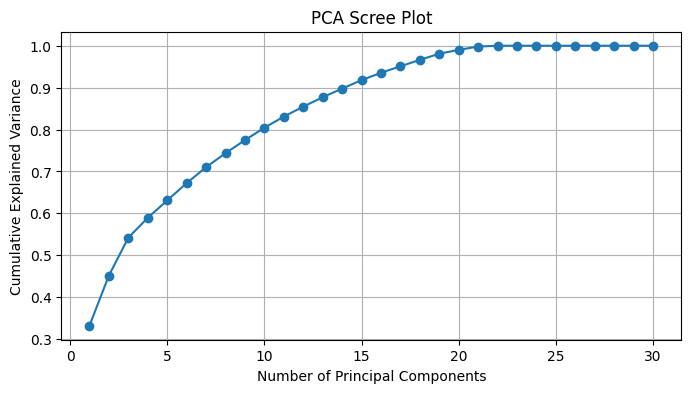

In [57]:


plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.show()


In [58]:
explained_variance_first_17 = np.sum(explained_var[:18])
print(f"Variance explained by the first 17 components: {explained_variance_first_17:.4f}")


Variance explained by the first 17 components: 0.9662


In [69]:
# after performing PCA we see that the first 18 columns give great info about the dataset, 
# hence neglect th remaing columns
X = df_encoded.iloc[:,:18]

In [80]:
y = target_column.copy()

In [81]:
y.replace({'No':0, 'Yes': 1}, inplace=True)
y = pd.DataFrame(y)

C:\Users\UltraBook 3.1\AppData\Local\Temp\ipykernel_22760\2064354681.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace({'No':0, 'Yes': 1}, inplace=True)


In [82]:
merged_df = X.merge(y, left_index=True, right_index=True)


In [83]:
merged_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,Churn
0,0,1,29,29,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,34,56,1889,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,0,2,53,108,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
3,0,45,42,1840,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,2,70,151,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84,1990,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0
7039,0,72,103,7362,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0
7040,0,11,29,346,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0
7041,1,4,74,306,1,1,0,1,0,1,1,0,0,0,0,0,0,0,1


In [84]:
# Step 2: Split into train (80%) and temporary (20%)
train_df, temp_df = train_test_split(merged_df, test_size=0.2, random_state=42)

# Step 3: Split temp_df into validation (50%) and test (50%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# You now have: train_df, val_df, test_df
# For train set
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']

# For validation set
X_val = val_df.drop('Churn', axis=1)
y_val = val_df['Churn']

# For test set
X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']


In [129]:
X_train_scaled = scaler.fit_transform(X_train)

model = RandomForestClassifier(random_state=42,max_depth=16,class_weight='balanced')
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=16, random_state=42)

In [132]:
# validating the model
X_val_scaled = scaler.transform(X_val)
y_pred_val = model.predict(X_val_scaled)

In [133]:

from sklearn.metrics import accuracy_score

# Compare predicted and true labels
accuracy = accuracy_score(y_val, y_pred_val)

print(f"validation Accuracy: {accuracy:.4f}")



validation Accuracy: 0.7898


In [143]:
from sklearn.metrics import classification_report, confusion_matrix


# testing the model
X_test_scaled = scaler.transform(X_test)
y_pred_test = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       519
           1       0.54      0.50      0.52       186

    accuracy                           0.76       705
   macro avg       0.68      0.67      0.68       705
weighted avg       0.75      0.76      0.75       705



array([[440,  79],
       [ 93,  93]])

In [144]:
X_test_scaled

array([[-0.4377492 , -1.28460467, -0.47853331, ...,  1.36271713,
        -0.52408075, -0.72212816],
       [-0.4377492 ,  1.17215924,  0.28590945, ..., -0.73382801,
        -0.52408075,  1.38479574],
       [-0.4377492 ,  0.96742892, -1.34268599, ..., -0.73382801,
         1.9081029 , -0.72212816],
       ...,
       [-0.4377492 , -0.26095304, -1.5088692 , ..., -0.73382801,
         1.9081029 , -0.72212816],
       [-0.4377492 , -0.05622271,  0.45209266, ...,  1.36271713,
        -0.52408075, -0.72212816],
       [-0.4377492 , -1.28460467, -1.1100295 , ...,  1.36271713,
        -0.52408075, -0.72212816]])

In [141]:
count_ones = sum(y_pred_test == 1)
print(count_ones)

172
